환경생태정보학 2주차 (2023. 09. 18.) 수업 자료
#Python 기초 실습 : (데이터 읽기, 저장)

MADE BY Siwoo Baek
Contact : seew00@uos.ac.kr

In [11]:
#Python의 Pandas 라이브러리 불러오기
import pandas as pd

외부에서 데이터를 다운받고 데이터프레임으로 불러오는 연습을 해봅시다.

오늘 활용할 데이터는 '기상청 기상자료개방포털'에서 다운받을 수 있는 기후통계를 이용해보도록 하겠습니다.

https://data.kma.go.kr/cmmn/main.do 로 들어가서 기후통계 > 기온분석에 들어가서 csv로 다운받아봅시다

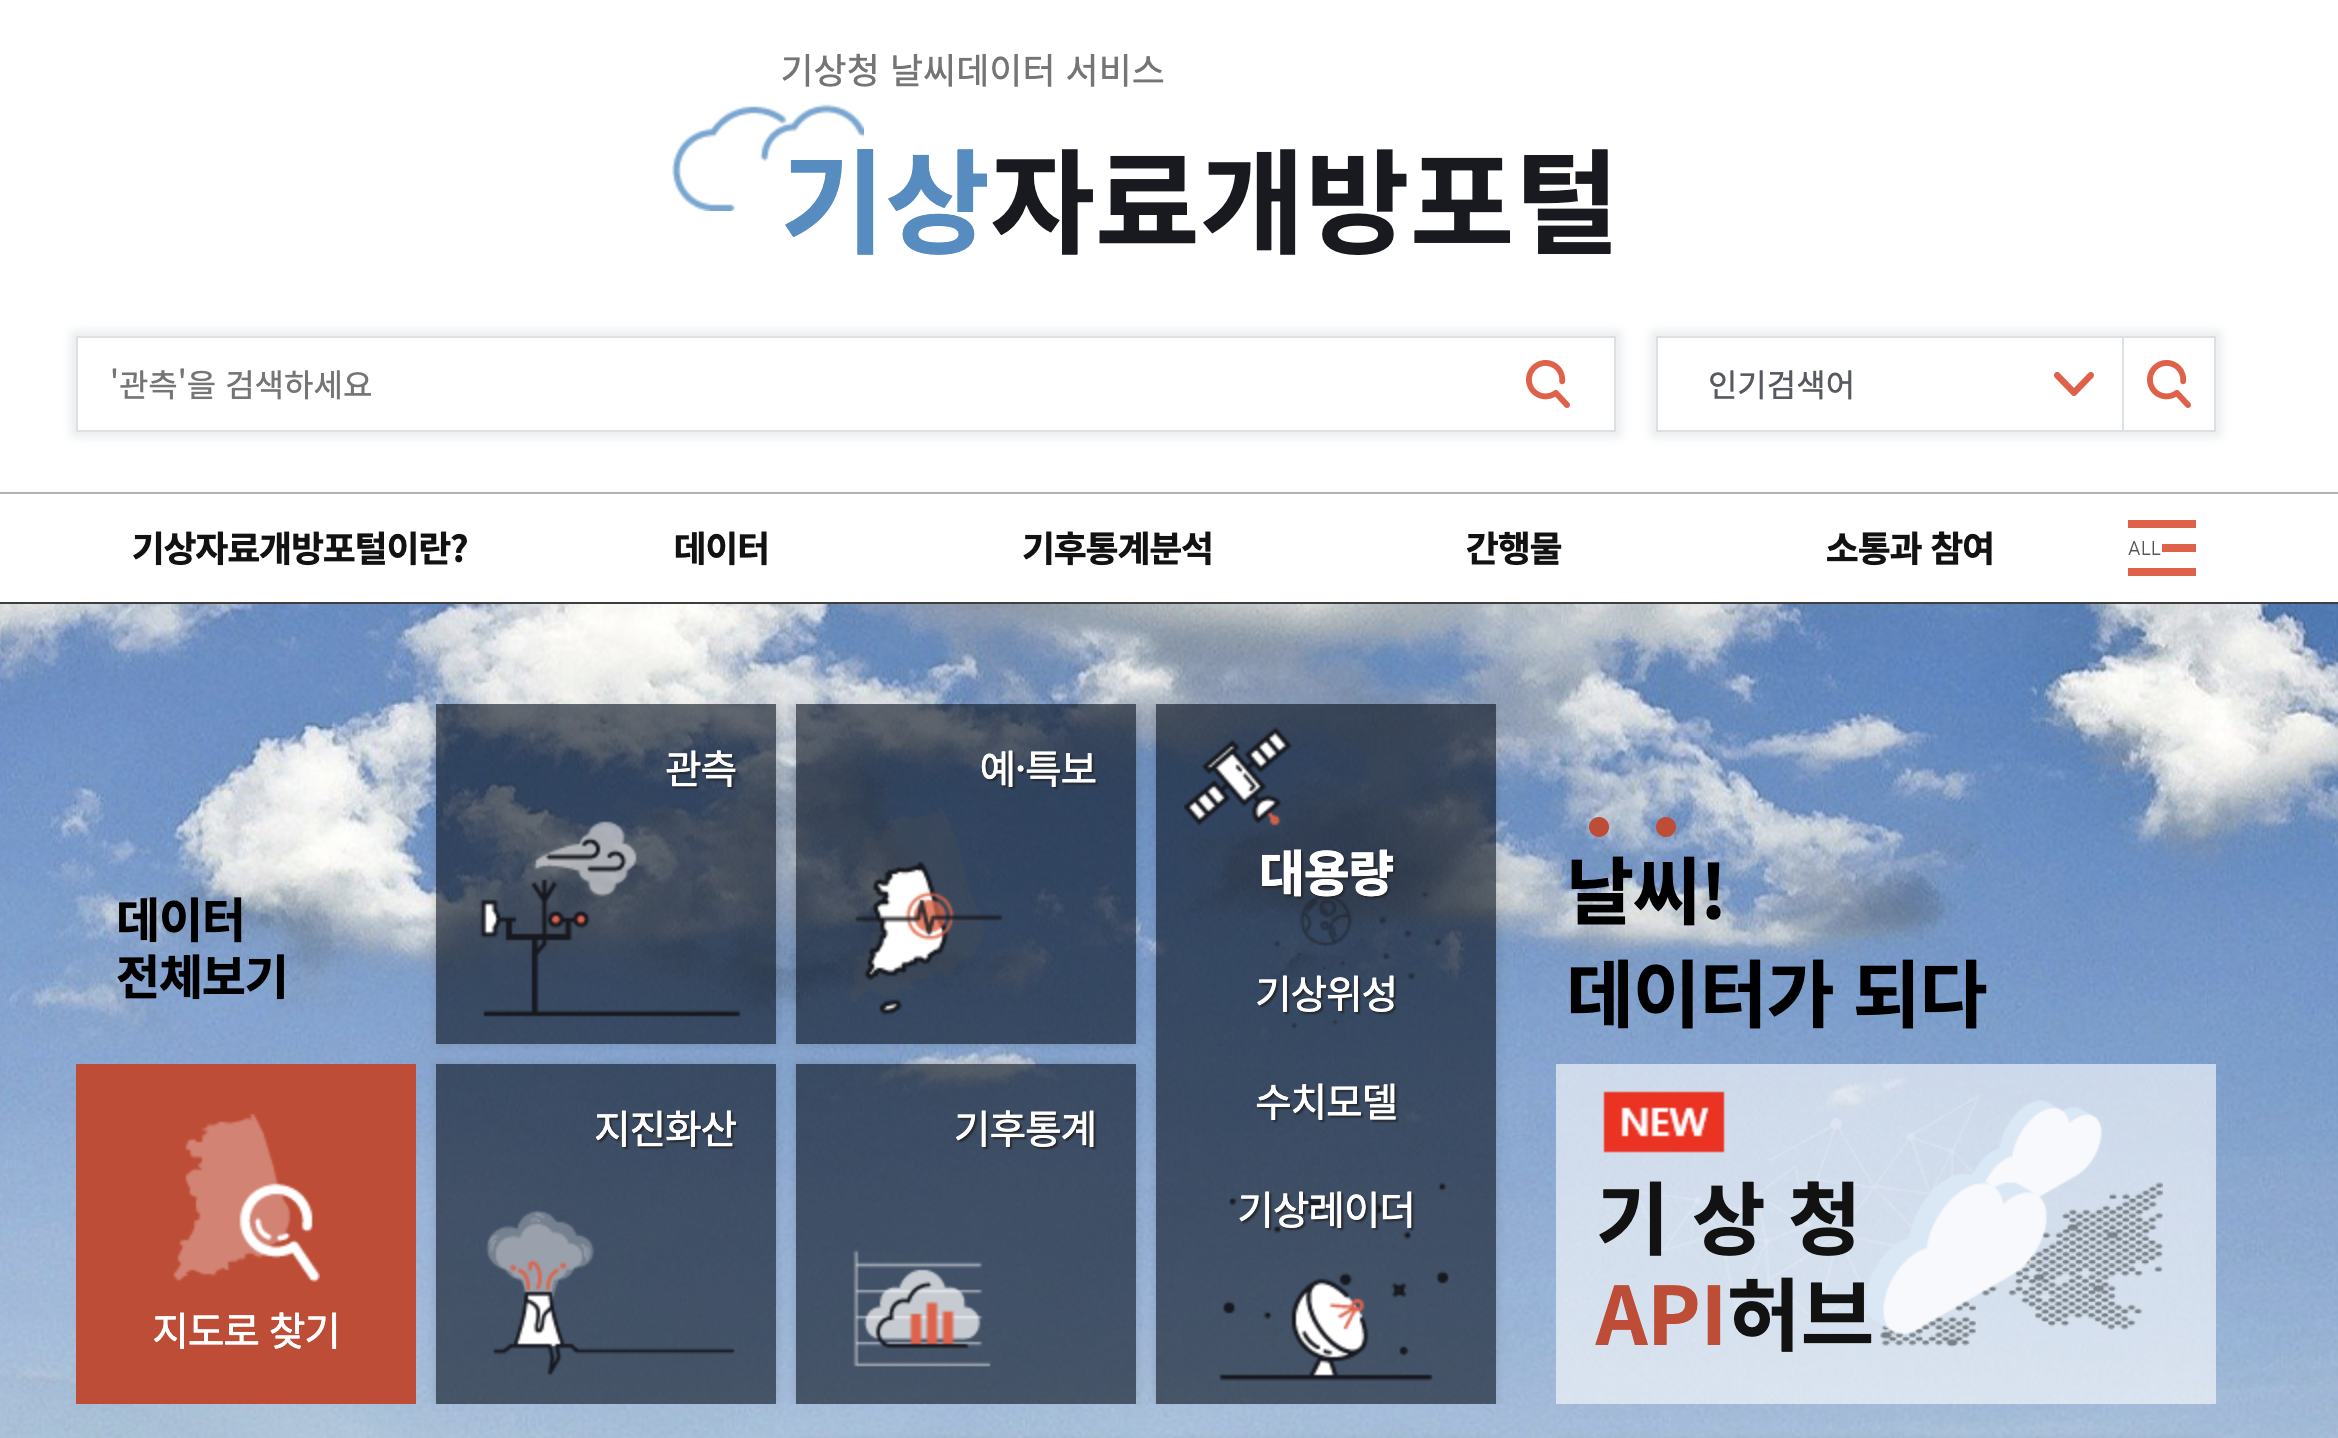

---

데이터 불러오기

1. 데이터의 형태를 보기위해 csv 파일을 메모장, 노트패드, 엑셀로 열어봅시다.
2. Pandas 라이브러리에서 csv를 데이터 프레임 형식으로 함수는 .read_csv() 함수입니다. () 안에는 파일의 경로를 입력합니다.
3. df 라는 변수를 만들어서 불러올 데이터 프레임으로 정의해봅시다.


In [12]:
df = pd.read_csv(ta_20230912104809.csv)
df

NameError: name 'ta_20230912104809' is not defined

오류가 떴네요! 이 오류는 () 안에 ''를 넣지 않아서 생긴 문제에요. 따옴표 안에 파일 경로를 입력해봅시다

In [ ]:
df = pd.read_csv('ta_20230912104809.csv')
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 0: invalid start byte

또 다시 오류네요. 이번엔 인코딩 오류네요. ('경로', encoding='cp949')를 입력해보아 인코딩 문제를 해결해봅시다

In [ ]:
df = pd.read_csv('ta_20230912104809.csv', encoding='cp949')
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 8, saw 5


Error tokenizing data는 예상되는 필드와 특정 라인에서의 데이터가 다를때 생기는 문제입니다.
데이터 파일을 열어보고 형식을 살펴보며 무엇이 문제인지 생각해봅시다.

여러분이 생각하는 해결방법은 무엇인가요? 

저는 문제가 되는 행을 통채로 날려버리기로 했어요

In [ ]:
# 문제가 되는 행을 통채로 날려버리기. 8번째 line 부터 불러오면 되니까 skiprows 활용해보자
df = pd.read_csv('ta_20230912104809.csv',skiprows = 7 ,encoding='cp949')
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2023-08-13,108,27.0,22.6,31.1
1,\t2023-08-14,108,28.1,24.8,31.9
2,\t2023-08-15,108,28.6,24.7,32.7
3,\t2023-08-16,108,27.3,24.7,31.6
4,\t2023-08-17,108,28.2,24.5,32.4
5,\t2023-08-18,108,29.1,25.5,33.3
6,\t2023-08-19,108,29.1,26.4,33.6
7,\t2023-08-20,108,28.3,25.5,31.8
8,\t2023-08-21,108,29.5,26.0,33.6
9,\t2023-08-22,108,27.6,25.8,32.2


In [ ]:
#데이터가 없는 9월 11일 데이터 빼버리자. .drop 함수를 이용하면 된다. axis = 0 이면 행, = 1 이면 열!
df.drop(29, axis=0, inplace=True)
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2023-08-13,108,27.0,22.6,31.1
1,\t2023-08-14,108,28.1,24.8,31.9
2,\t2023-08-15,108,28.6,24.7,32.7
3,\t2023-08-16,108,27.3,24.7,31.6
4,\t2023-08-17,108,28.2,24.5,32.4
5,\t2023-08-18,108,29.1,25.5,33.3
6,\t2023-08-19,108,29.1,26.4,33.6
7,\t2023-08-20,108,28.3,25.5,31.8
8,\t2023-08-21,108,29.5,26.0,33.6
9,\t2023-08-22,108,27.6,25.8,32.2


---
이제 파일을 불러오고 원하는 형태로 만드는 것 까진 해봤습니다!
이제 데이터 프레임 관련된 함수 중 기본적인 것 몇 개만 연습해볼까요?

In [13]:
# 특정 열을 index로 지정하기 : index_col = *인덱스번호 또는 *칼럼명
df = pd.read_csv('ta_20230912104809.csv',index_col=0,skiprows = 7 ,encoding='cp949')
df

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
\t2023-08-13,108,27.0,22.6,31.1
\t2023-08-14,108,28.1,24.8,31.9
\t2023-08-15,108,28.6,24.7,32.7
\t2023-08-16,108,27.3,24.7,31.6
\t2023-08-17,108,28.2,24.5,32.4
\t2023-08-18,108,29.1,25.5,33.3
\t2023-08-19,108,29.1,26.4,33.6
\t2023-08-20,108,28.3,25.5,31.8
\t2023-08-21,108,29.5,26.0,33.6


In [14]:
df = pd.read_csv('ta_20230912104809.csv',index_col='날짜',skiprows = 7 ,encoding='cp949')
df

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
\t2023-08-13,108,27.0,22.6,31.1
\t2023-08-14,108,28.1,24.8,31.9
\t2023-08-15,108,28.6,24.7,32.7
\t2023-08-16,108,27.3,24.7,31.6
\t2023-08-17,108,28.2,24.5,32.4
\t2023-08-18,108,29.1,25.5,33.3
\t2023-08-19,108,29.1,26.4,33.6
\t2023-08-20,108,28.3,25.5,31.8
\t2023-08-21,108,29.5,26.0,33.6


In [15]:
#칼럼명 변경하기
df = pd.read_csv('ta_20230912104809.csv', names=['Date', 'Location', 'Average', 'Low', 'High'],skiprows = 7 ,encoding='cp949')
df

,Date,Location,Average,High,Low
0,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
1,\t2023-08-13,108,27,22.6,31.1
2,\t2023-08-14,108,28.1,24.8,31.9
3,\t2023-08-15,108,28.6,24.7,32.7
4,\t2023-08-16,108,27.3,24.7,31.6
5,\t2023-08-17,108,28.2,24.5,32.4
6,\t2023-08-18,108,29.1,25.5,33.3
7,\t2023-08-19,108,29.1,26.4,33.6
8,\t2023-08-20,108,28.3,25.5,31.8
9,\t2023-08-21,108,29.5,26,33.6


---
이번엔 앞에서 가져온 데이터를 활용해서 필요한 정보만 빼내는걸 한번 해볼까요?

In [36]:
df = pd.read_csv('ta_20230912104809.csv', names=['Date', 'Location', 'Average', 'Low', 'High'],skiprows = 7 ,encoding='cp949')
df.drop(0, axis=0, inplace=True)
df.drop(30, axis=0, inplace=True)
df


,Date,Location,Average,Low,High
1,\t2023-08-13,108,27,22.6,31.1
2,\t2023-08-14,108,28.1,24.8,31.9
3,\t2023-08-15,108,28.6,24.7,32.7
4,\t2023-08-16,108,27.3,24.7,31.6
5,\t2023-08-17,108,28.2,24.5,32.4
6,\t2023-08-18,108,29.1,25.5,33.3
7,\t2023-08-19,108,29.1,26.4,33.6
8,\t2023-08-20,108,28.3,25.5,31.8
9,\t2023-08-21,108,29.5,26,33.6
10,\t2023-08-22,108,27.6,25.8,32.2


In [21]:
#평균기온이 25도 이상인 행의 갯수를 세어보자
len(df.loc[df['Average']>25])


TypeError: '>' not supported between instances of 'str' and 'int'

In [22]:
#오류를 수정해보자. 위 오류는 Average 열에 데이터가 숫자가 아니라서 발생하는 오류이다.
df['Average'] = df['Average'].astype(float)
len(df.loc[df['Average'] > 25])


23

In [24]:
#위와 같은 값을 만드는 또 다른 함수
df.loc[df['Average']>25].shape[0]

23

In [40]:
#특정 조건을 만족하는 데이터를 필터링 해보자!
df['Average'] = df['Average'].astype(float)
aver_over25 = df['Average'] >= 25
aver_over25_df = df[aver_over25]
aver_over25_df

,Date,Location,Average,Low,High
1,\t2023-08-13,108,27.0,22.6,31.1
2,\t2023-08-14,108,28.1,24.8,31.9
3,\t2023-08-15,108,28.6,24.7,32.7
4,\t2023-08-16,108,27.3,24.7,31.6
5,\t2023-08-17,108,28.2,24.5,32.4
6,\t2023-08-18,108,29.1,25.5,33.3
7,\t2023-08-19,108,29.1,26.4,33.6
8,\t2023-08-20,108,28.3,25.5,31.8
9,\t2023-08-21,108,29.5,26,33.6
10,\t2023-08-22,108,27.6,25.8,32.2


In [41]:
df['Average'] = df['Average'].astype(float)
aver_same27 = df['Average'] == 27
aver_same27_df = df[aver_same27]
aver_same27_df

,Date,Location,Average,Low,High
1,\t2023-08-13,108,27.0,22.6,31.1
23,\t2023-09-04,108,27.0,24.3,30.2


In [43]:
#이제 aver_over25_df와 aver_same27_df를 저장해보자
aver_over25_df.to_csv('over25.csv')
aver_same27_df.to_csv('same27.csv')

이제 데이터 프레임을 이용해서 간단한 데이터 처리를 할 수 있게 되었어요! 축하드립니다 :)
---
이번에는 반복문(for in)에 대해서 배워볼거에요. 반복문은 말 그대로 반복적으로 작업을 수행하는걸 의미해요.
기본적으로 for variable in iterator : 의 형식을 갖추고 있어요.
iterator 안의 원소를 하나씩 variable에 할당하여 iterator의 원소만큼 반복 진행하는 것을 말해요.

In [44]:
for item in range(1, 6):
    print(item)

1
2
3
4
5


iterable 하다는건 뭘까요? collections.Iterable에 속한 instance인지 확인하면 됩니다.
이를 확인 할 수 있는 방법이 있습니다. 바로 isinstance 함수를 활용하는 방법이죠. 
isinstance 함수는 첫번째 파라미터가 두번째 파라미터 클래스의 instance이면 True를 반환합니다

In [47]:
import collections

# List
var_list = [1, 3, 5, 7]
isinstance(var_list, collections.Iterable)


True

In [49]:
#Dictionary
var_dict = {"a": 1, "b":1}
isinstance(var_dict, collections.Iterable)

True

In [50]:
#Set
var_set = {1, 3}
isinstance(var_set, collections.Iterable)

True

In [51]:
#String
var_str = "abc"
isinstance(var_str, collections.Iterable)

True

In [52]:
#Bytes
var_bytes = b'abcdef'
isinstance(var_bytes, collections.Iterable)

True

In [53]:
#Tuple
var_tuple = (1, 3, 5, 7)
isinstance(var_tuple, collections.Iterable)

True

In [54]:
#Range
var_range = range(0,5)
isinstance(var_range, collections.Iterable)

True

타입 중 list, dictionary, set, string, tuple, bytes가 iterable한 타입임을 알 수 있습니다.

위에서 정의한 여러 타입들을 이용해서 for문을 작동시켜볼까요?



In [57]:
for i in var_list:
    print(i)

1
3
5
7


In [58]:
for i in var_dict:
    print(i)

a
b


In [59]:
for i in var_set:
    print(i)

1
3


In [60]:
for i in var_bytes:
    print(i)

97
98
99
100
101
102


In [61]:
for i in var_tuple:
    print(i)

1
3
5
7


In [62]:
for i in var_range:
    print(i)

0
1
2
3
4
